In [28]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

# variable information 
print(wholesale_customers.variables) 


               name     role         type demographic description units  \
0           Channel  Feature  Categorical        None        None  None   
1            Region   Target  Categorical        None        None  None   
2             Fresh  Feature      Integer        None        None  None   
3              Milk  Feature      Integer        None        None  None   
4           Grocery  Feature      Integer        None        None  None   
5            Frozen  Feature      Integer        None        None  None   
6  Detergents_Paper  Feature      Integer        None        None  None   
7        Delicassen  Feature      Integer        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7             no  


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


In [30]:
df = pd.concat([X,y], axis=1)
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,3
436,1,39228,1431,764,4510,93,2346,3
437,2,14531,15488,30243,437,14841,1867,3
438,1,10290,1981,2232,1038,168,2125,3


In [31]:
df.isnull().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64

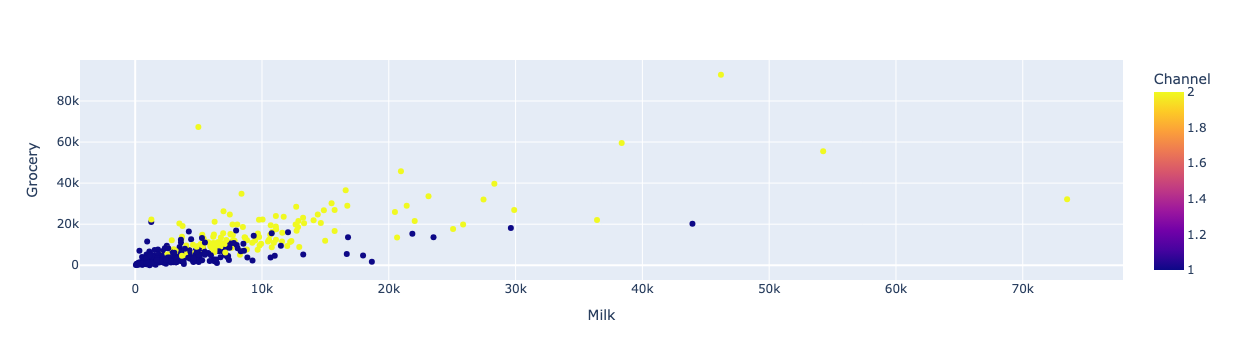

In [32]:
fig = px.scatter(X, x="Milk", y="Grocery", color="Channel")
fig.show()

<Axes: xlabel='Milk', ylabel='Count'>

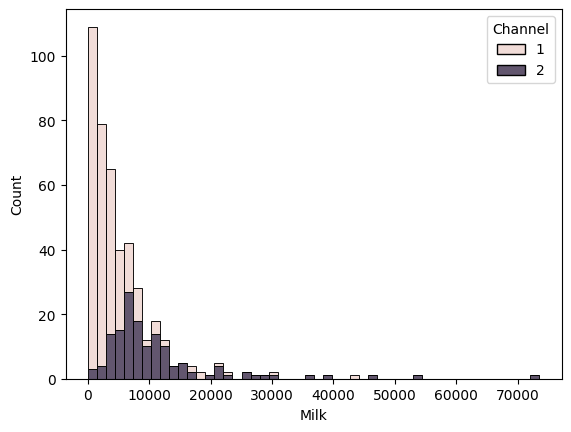

In [33]:
sns.histplot(data=X, x="Milk", hue="Channel", multiple="stack")

# Cluster Map

<Figure size 1000x800 with 0 Axes>

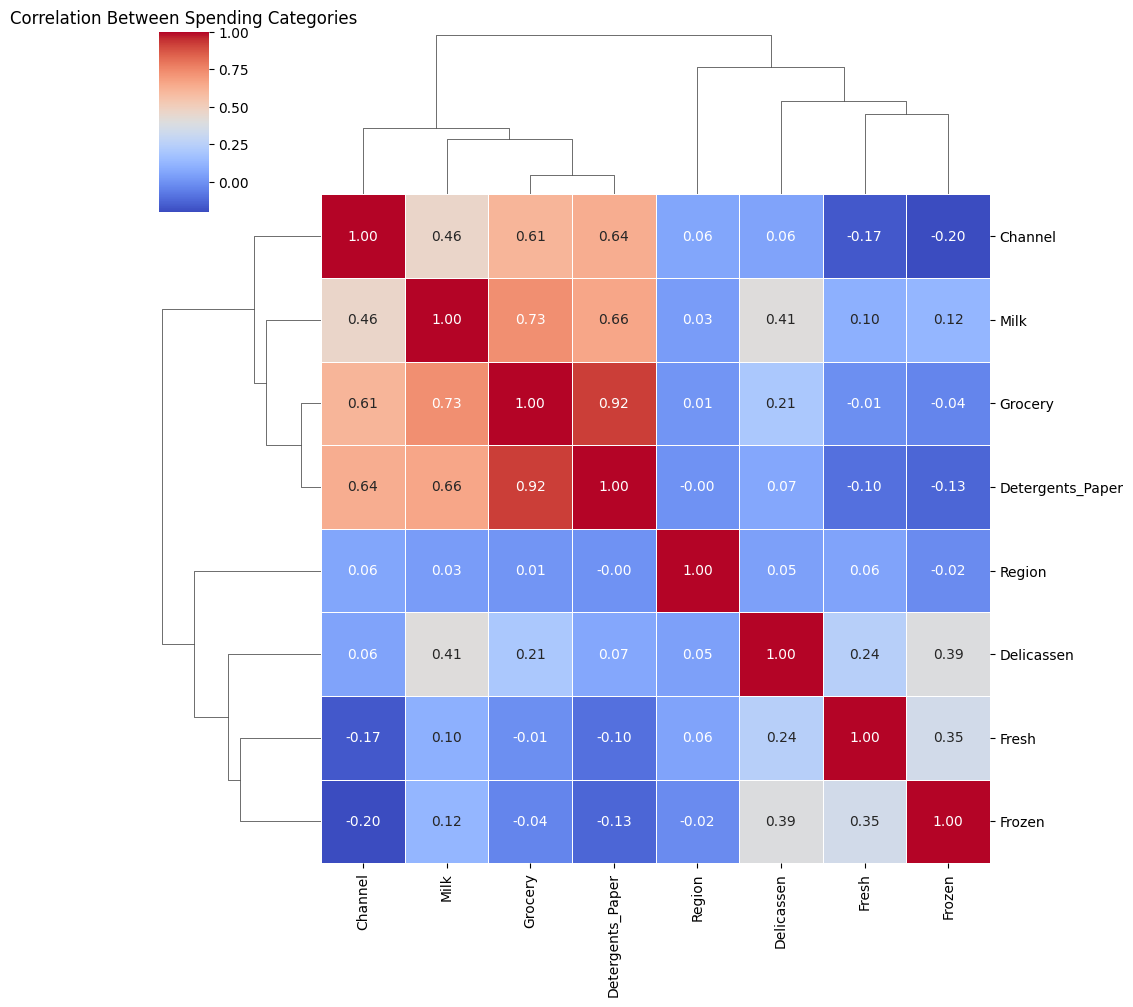

In [34]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Spending Categories')
plt.show()

# Pairplot

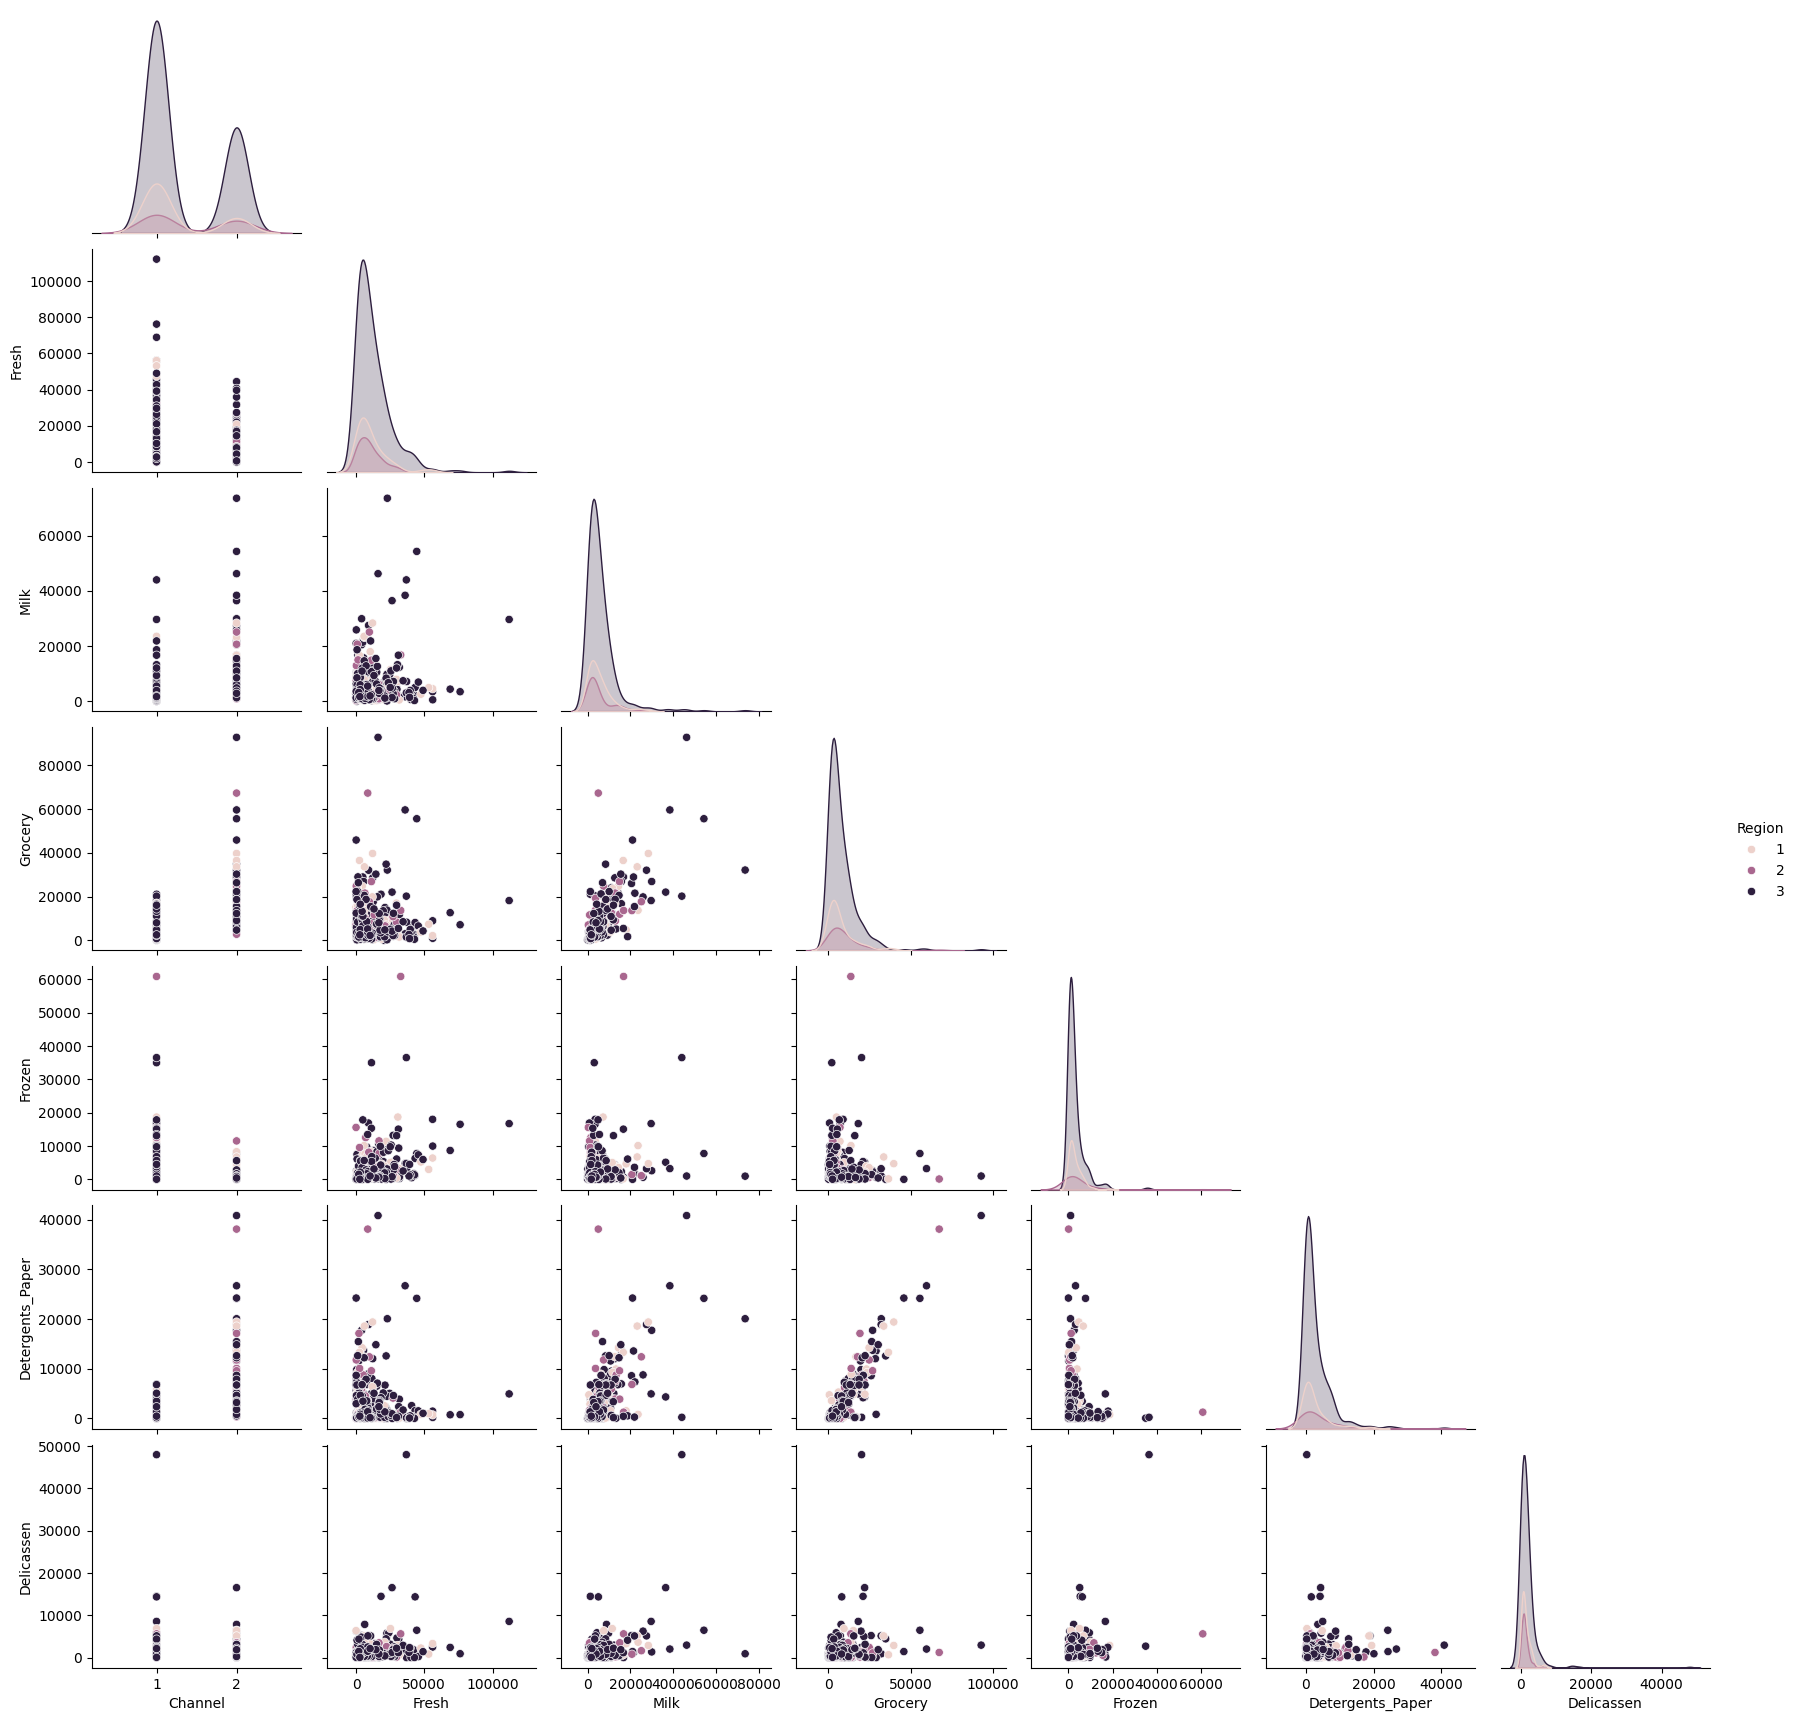

In [36]:
sns.pairplot(df, hue="Region", corner = True)

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [38]:
model = DBSCAN()
scaler = StandardScaler()

In [39]:
df_scaled = scaler.fit_transform(df)

In [40]:
# Define a broader range of epsilon values
epsilon_values = np.linspace(0.001, 3, 50)  # Increase upper limit to 10

# Define min_samples as 2 times the number of features in the reduced dataset
min_samples = 2 * df_scaled.shape[1]

# Dictionary to store the percentage of outliers for each epsilon value
outlier_percentages = {}

# Loop through each epsilon value to create and evaluate a DBSCAN model
for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(df_scaled)
    n_outliers = np.sum(cluster_labels == -1)
    outlier_percentage = (n_outliers / df_scaled.shape[0]) * 100
    outlier_percentages[epsilon] = outlier_percentage

# Print or log the outlier percentages for each epsilon value
for epsilon, percentage in outlier_percentages.items():
    print(f"Epsilon: {epsilon:.3f}, Outlier Percentage: {percentage:.2f}%")


Epsilon: 0.001, Outlier Percentage: 100.00%
Epsilon: 0.062, Outlier Percentage: 100.00%
Epsilon: 0.123, Outlier Percentage: 100.00%
Epsilon: 0.185, Outlier Percentage: 100.00%
Epsilon: 0.246, Outlier Percentage: 100.00%
Epsilon: 0.307, Outlier Percentage: 96.14%
Epsilon: 0.368, Outlier Percentage: 85.68%
Epsilon: 0.429, Outlier Percentage: 81.82%
Epsilon: 0.491, Outlier Percentage: 76.36%
Epsilon: 0.552, Outlier Percentage: 73.64%
Epsilon: 0.613, Outlier Percentage: 70.45%
Epsilon: 0.674, Outlier Percentage: 65.00%
Epsilon: 0.735, Outlier Percentage: 56.82%
Epsilon: 0.797, Outlier Percentage: 47.95%
Epsilon: 0.858, Outlier Percentage: 39.55%
Epsilon: 0.919, Outlier Percentage: 32.50%
Epsilon: 0.980, Outlier Percentage: 27.95%
Epsilon: 1.041, Outlier Percentage: 24.55%
Epsilon: 1.103, Outlier Percentage: 22.27%
Epsilon: 1.164, Outlier Percentage: 20.91%
Epsilon: 1.225, Outlier Percentage: 20.23%
Epsilon: 1.286, Outlier Percentage: 19.32%
Epsilon: 1.347, Outlier Percentage: 17.95%
Epsilo

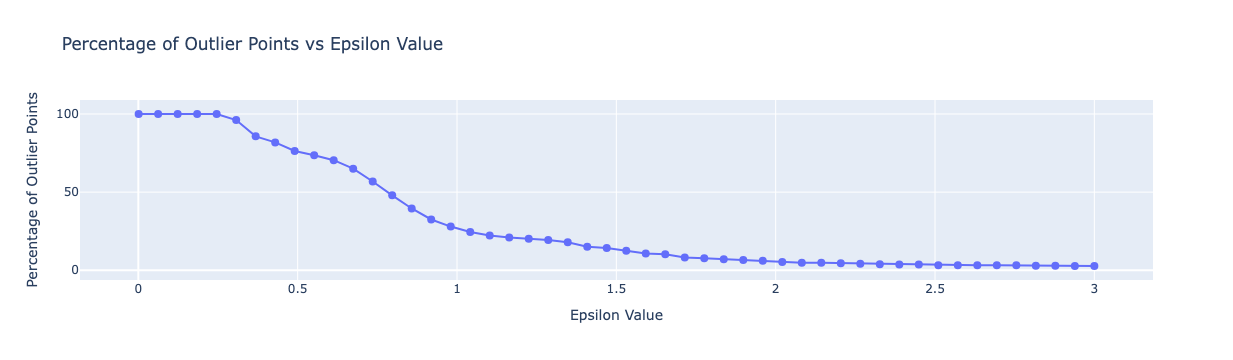

In [41]:
# Extract epsilon values and outlier percentages
epsilon_values = list(outlier_percentages.keys())
outlier_percentages_values = list(outlier_percentages.values())

# Create a line plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=epsilon_values, y=outlier_percentages_values, mode='lines+markers', 
                         name='Percentage of Outliers', marker=dict(size=8)))

fig.update_layout(title='Percentage of Outlier Points vs Epsilon Value',
                  xaxis_title='Epsilon Value',
                  yaxis_title='Percentage of Outlier Points')

fig.show()

# DBSCAN with Chosen Epsilon value

In [42]:
model = DBSCAN(eps= 2.939)

In [43]:
cluster_labels = model.fit_predict(df_scaled)

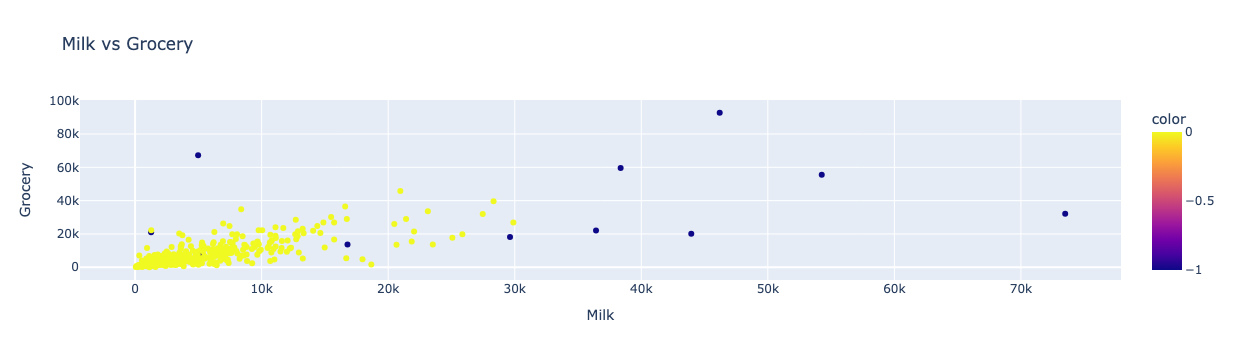

In [44]:
fig = px.scatter(df, x="Milk", y="Grocery", color=cluster_labels, title="Milk vs Grocery")
fig.show()

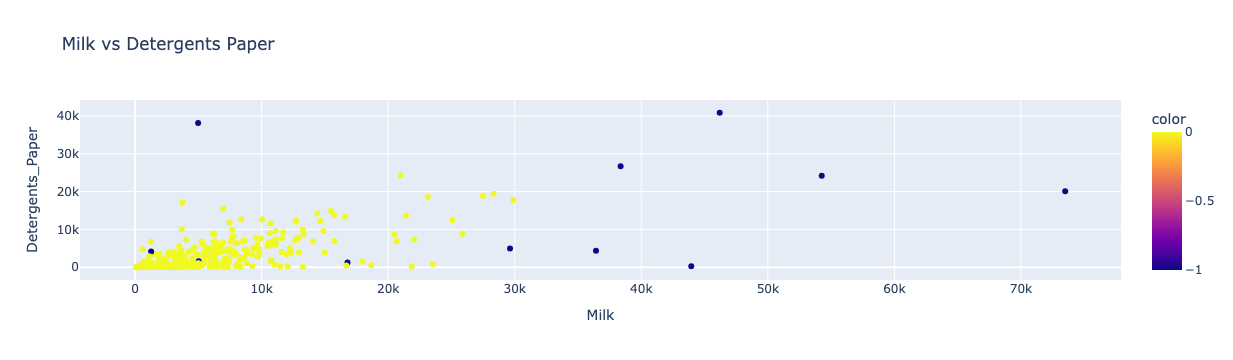

In [45]:
fig = px.scatter(df, x="Milk", y="Detergents_Paper", color=cluster_labels, title="Milk vs Detergents Paper")
fig.show()

In [46]:
df['Labels'] = cluster_labels

In [47]:
grouped = df.groupby('Labels')[['Fresh', 'Milk', 'Grocery',"Frozen", "Detergents_Paper", "Delicassen"]].mean()

In [48]:
grouped

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,34081.083333,29455.666667,34378.750000,14931.333333,13874.166667,10307.500000
0,11381.210280,5132.918224,7210.320093,2739.425234,2573.287383,1278.628505


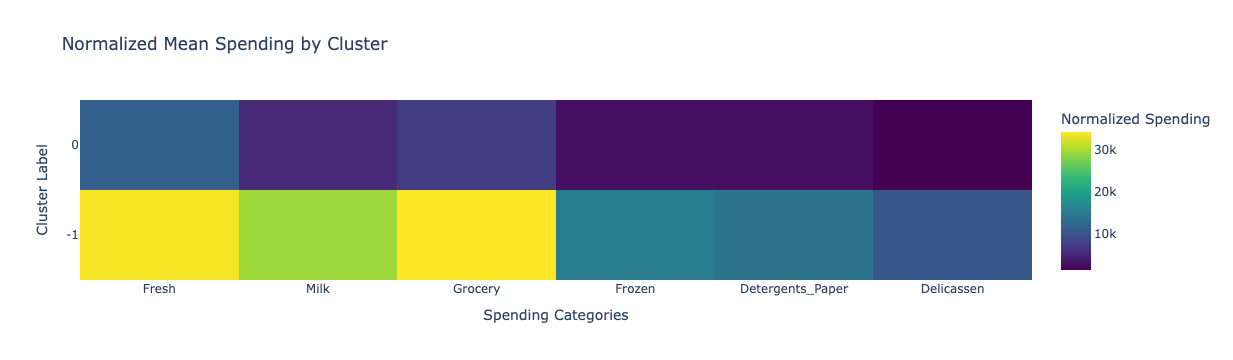

In [51]:
# Create a Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=grouped.values,
    x=grouped.columns,
    y=grouped.index,
    colorscale='Viridis',  # You can change this to any color scale you prefer
    colorbar=dict(title='Normalized Spending')))

fig.update_layout(
    title='Normalized Mean Spending by Cluster',
    xaxis_title='Spending Categories',
    yaxis_title='Cluster Label',
    yaxis=dict(type='category')
)

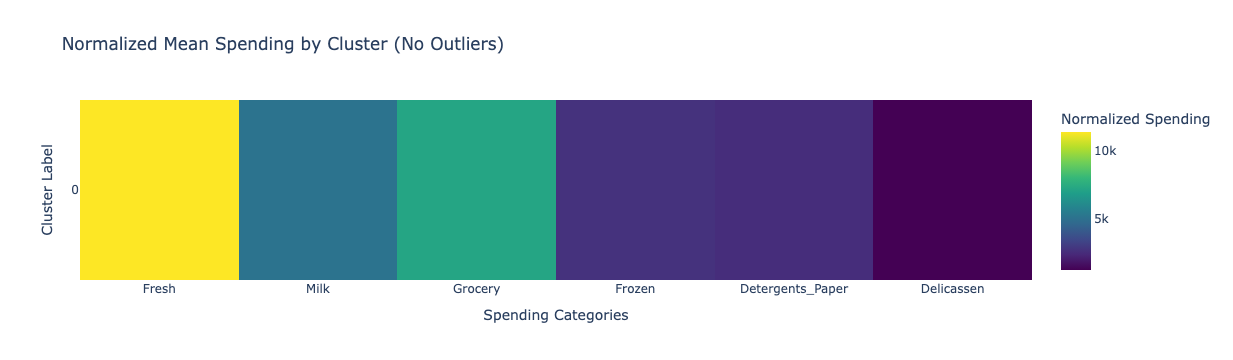

In [52]:
# Exclude outliers where label is -1
df_no_outliers = df[df['Labels'] != -1]

# Calculate the mean spending amounts by cluster, excluding outliers
grouped_no_outliers = df_no_outliers.groupby('Labels')[['Fresh', 'Milk', 'Grocery',"Frozen", "Detergents_Paper", "Delicassen"]].mean()


# Create a Plotly heatmap for non-outlier data
fig = go.Figure(data=go.Heatmap(
    z=grouped_no_outliers.values,
    x=grouped_no_outliers.columns,
    y=grouped_no_outliers.index,
    colorscale='Viridis',
    colorbar=dict(title='Normalized Spending')))

fig.update_layout(
    title='Normalized Mean Spending by Cluster (No Outliers)',
    xaxis_title='Spending Categories',
    yaxis_title='Cluster Label',
    yaxis=dict(type='category')
)

fig.show()

## What spending category were the two clusters mode different in?

The category where the two clusters differ the most is Grocery, with a difference of 27,168.43. This indicates that the customers in cluster -1 spend significantly more on groceries than those in cluster 0. This significant difference suggests that grocery spending is a key feature that differentiates these two clusters, potentially indicating different types of customers or consumer behaviors within these clusters (e.g., one might represent large grocery stores or supermarkets, and the other might represent smaller local stores or individual consumer spending patterns).

# Applying MinMax Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler_mm = MinMaxScaler()
scaler_mm.fit_transform(grouped)

array([[1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [25]:
scaler_mm = MinMaxScaler()
grouped_scaled = pd.DataFrame(scaler_mm.fit_transform(grouped), columns=['Fresh', 'Milk', 'Grocery',"Frozen", "Detergents_Paper", "Delicassen"], index=grouped.index)
grouped_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.0,1.0,1.0,1.0,1.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0


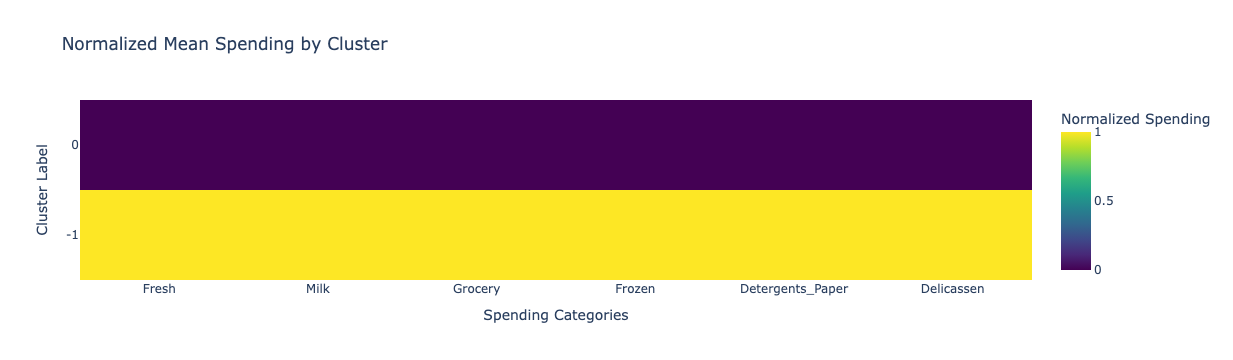

In [26]:
# Create a Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=grouped_scaled.values,
    x=grouped_scaled.columns,
    y=grouped_scaled.index,
    colorscale='Viridis',  # You can change this to any color scale you prefer
    colorbar=dict(title='Normalized Spending')))

fig.update_layout(
    title='Normalized Mean Spending by Cluster',
    xaxis_title='Spending Categories',
    yaxis_title='Cluster Label',
    yaxis=dict(type='category')
)

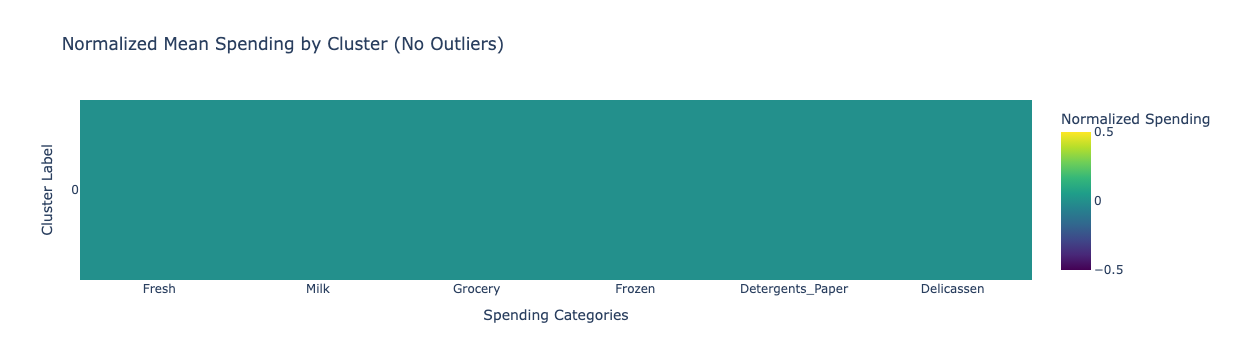

In [27]:
# Exclude outliers where label is -1
df_no_outliers = df[df['Labels'] != -1]

# Calculate the mean spending amounts by cluster, excluding outliers
grouped_no_outliers = df_no_outliers.groupby('Labels')[['Fresh', 'Milk', 'Grocery',"Frozen", "Detergents_Paper", "Delicassen"]].mean()

# Normalize the cluster means using MinMaxScaler
scaler_mm = MinMaxScaler()
grouped_no_outliers_scaled = pd.DataFrame(scaler_mm.fit_transform(grouped_no_outliers), columns=['Fresh', 'Milk', 'Grocery',"Frozen", "Detergents_Paper", "Delicassen"], index=grouped_no_outliers.index)

# Create a Plotly heatmap for non-outlier data
fig = go.Figure(data=go.Heatmap(
    z=grouped_no_outliers_scaled.values,
    x=grouped_no_outliers_scaled.columns,
    y=grouped_no_outliers_scaled.index,
    colorscale='Viridis',
    colorbar=dict(title='Normalized Spending')))

fig.update_layout(
    title='Normalized Mean Spending by Cluster (No Outliers)',
    xaxis_title='Spending Categories',
    yaxis_title='Cluster Label',
    yaxis=dict(type='category')
)

fig.show()

## What spending category were the two clusters mode different in?

Given that each category shows the maximum possible difference (1.0 - 0.0 = 1.0), it's clear that every category shows the maximum difference between these two clusters. Therefore, no single category stands out on its own since all categories exhibit the same level of distinction between the clusters. This could imply a consistent behavioral difference across all types of spending between the highest and lowest spenders in your dataset.The values are normalized between 0 (minimum) and 1 (maximum), suggesting that in terms of spending, Cluster -1 represents the highest spenders across all categories, while Cluster 0 represents the lowest spenders. This uniform distinction across all spending categories shows that the two clusters are entirely different in their spending habits.